# Phân loại chữ viết tay - sử dụng bộ dữ liệu MNIST

Bài tập:  
1. Dùng 3 bộ classifier phân loại sử dụng bộ dữ liệu MNIST:
2. Xác định Confusion Matrix cho mỗi bộ.
3. Tính các metrics đánh giá các bộ phân loại.

## Gọi các bộ thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Dùng 3 bộ classifier đã học:
* Logistic Regression
* Linear Suport Vector Machine (SVM hay LinearSVC)
* Gaussian Naive Bayes

In [2]:
from sklearn.linear_model import LogisticRegression        
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

## Đọc và kiểm tra dữ liệu

Có nhiều cách load bộ dữ liệu MNIST  
* Gọi dữ liệu datasets của Scikit learn
* Đọc từ file ngoài (trên máy tính)
* Fetch về từ internet
* ...  

Chú ý rằng với mỗi cách khác nhau, cách xử lý dữ liệu ban đầu là khác nhau. Để xử lý được dữ liệu, ta phải hiểu được cách bộ dữ liệu được tổ chức như thế nào, sau đó tách ra các phần cần sử dụng.

In [3]:
# Fetch mnist online
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

d:\Programming\Python\Install\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Trích data ra từ bộ dữ liệu. 
Bộ dữ liệu MNIST là bộ dữ liệu hình ảnh của chữ viết tay. Các ảnh là ảnh xám (giá trị pixel từ 0-255) Kích thước mỗi ảnh là 28 x 28 pixels. Các ảnh này được tổ chức thành 1 mảng 784 phần tử

In [12]:
X = mnist['data']
y = mnist['target']
# X.shape # Kiểm tra cỡ của X

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Ở đây, bộ dữ liệu MNIST đã được tạo sẵn là với categorical encoding là label.

In [13]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Thử xét 1 dữ liệu

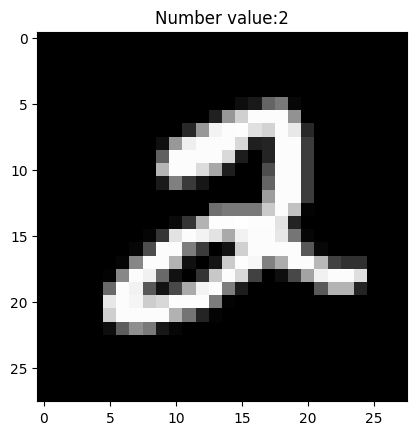

In [17]:
test_digit = X[5]
test_digit_image = test_digit.reshape(28, 28)
plt.imshow(test_digit_image, cmap='gray')
plt.axis("on")
plt.title('Number value:' + y[5])
plt.show()



## Một số kiểu tiền xử lý

Chuyển y sang dạng ordinary (dạng số)

In [19]:
y_processed = y.astype(np.uint8)
y_processed

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

Chuẩn hoá x.   
Có nhiều kiểu chuẩn hoá, gồm StandardScaler, MinMaxScaler....  
Với MinMaxScaler, giá trị được scale về theo tỉ lệ của giá trị lớn nhất và nhỏ nhất. 

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_processed = scaler.fit_transform(X)


Tách dữ liệu để train và test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)


## Train các bộ classifier

In [28]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)


GaussianNB()

In [29]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
lgr_clf = LogisticRegression()
lgr_clf.fit(X_train, y_train)

d:\Programming\Python\Install\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Vẽ các confusion matrix và in report

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


def confusion_plot(estimator, X_test, y_test):
    # Ve confustion Matrix

    y_pred_test = estimator.predict(X_test) 
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()
    disp.ax_.set_title(estimator)

    # Tạo report
    report = classification_report(y_test, y_pred_test)
    print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.87      0.89      0.88      1273
           6       0.95      0.96      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.89      1357
           9       0.91      0.89      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97 

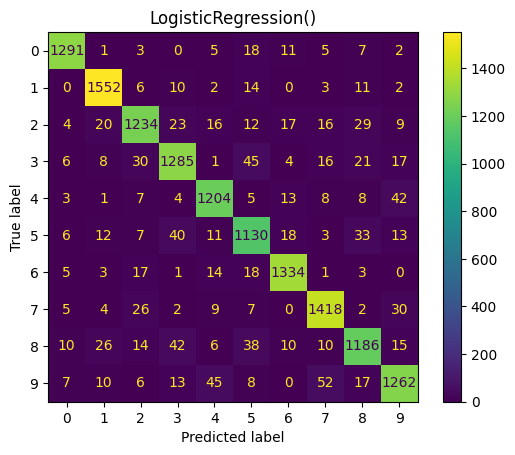

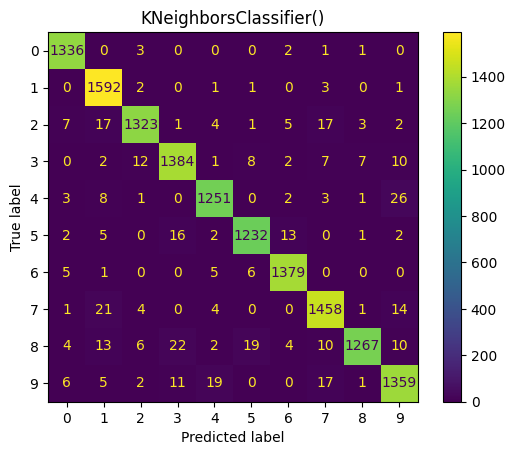

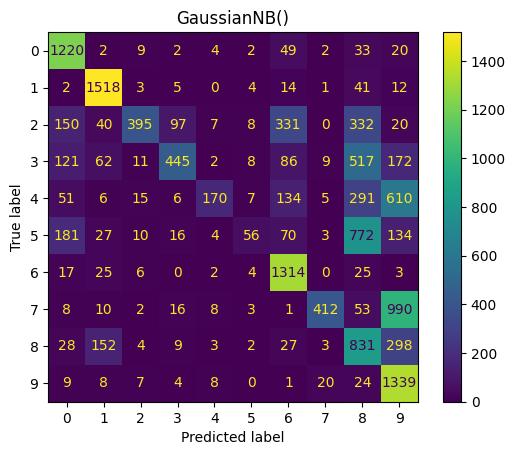

In [42]:
for i in {lgr_clf, knn_clf, gnb_clf}:
    confusion_plot(i,X_test, y_test)